In [2]:
from sympy import Symbol, sin, cos, atan
#%matplotlib notebook
#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
x_sym = Symbol("x")

In [4]:
#function = sin(x_sym)**2
function = atan(x_sym)/x_sym

C:\Users\user\AppData\Local\Temp\ipykernel_3064\1658631028.py:3: RuntimeWarning: invalid value encountered in true_divide
  y = np.arctan(x)/x


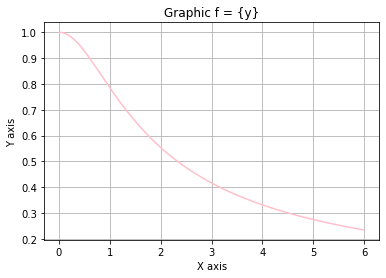

In [5]:
x = np.arange(0, 6, 0.01)
#y =  np.sin(x)**2
y = np.arctan(x)/x
plt.plot(x,y, color = 'pink')
plt.xlabel("X axis")
plt.ylabel("Y axis")
#plt.title('Graphic f = {y}')
plt.grid()
plt.show()

In [47]:
a = 0.001
b = 1
e = 0.01
n = 100

Rectangle Rule

In [48]:
def rectangle_rule(func, sym, a, b, e, h=0):
    if h==0:
        h = abs(a - b) / n

    h1 = a + h/2
    h2 = a + h/4
    summa1 = 0
    summa2 = 0
    while h1 < b:
        summa1 += func.evalf(subs={sym: h1}) * h
        h1 += h

    while h2 < b:
        summa2 += func.evalf(subs={sym: h2}) * (h/2)
        h2 += h/2

    if abs(summa1 - summa2) < e:
        return summa2
    return rectangle_method(func, sym, a, b, e, h/2)

print("\033[1m Result =", round(rectangle_rule(function, x_sym, a, b, e), 2))

 Result = 0.91


-----------------------------------------------------------------------

Trapezoid Rule

In [49]:
def trapezoid_rule(func, sym, a, b, e, h=0):
    if h==0:
        h = abs(a - b) / n

    h1 = a
    h2 = a
    summa1 = 0
    summa2 = 0
    
    while h1 < b:
        summa1 += (func.evalf(subs={sym: h1}) + func.evalf(subs={sym: h1 + h})) / 2 * h
        h1 += h


    while h2 < b:
        summa2 += (func.evalf(subs={sym: h2}) + func.evalf(subs={sym: h2 + h})) / 2 * (h/2)
        h2 += h/2

    if abs(summa1 - summa2) < e:
        return summa2
    return trapezoid_rule(func, sym, a, b, e, h/2)

print("\033[1m Result = ",  round(trapezoid_rule(function, x_sym, a, b, e), 2))

 Result =  0.92


-----------------------------------------------------------------------

Simpson Rule

In [50]:
def simpson_rule(func, sym, a, b, e, h=0):
    if h==0:
        h = abs(a - b) / n

    h1 = a
    h2 = a
    summa1 = 0
    summa2 = 0
    
    while h1 < b:
        summa1 += (func.evalf(subs={sym: h1}) +
                 4 * (func.evalf(subs={sym: h1 + h/2})) +
                 func.evalf(subs={sym: h1 + h})) / 6 * h
        h1 += h

    while h2 < b:
        summa2 += (func.evalf(subs={sym: h2}) +
                 4 * (func.evalf(subs={sym: h2 + h/4})) +
                 func.evalf(subs={sym: h2 + h/2})) / 6 * h/2
        h2 += h/2

    if abs(summa1 - summa2) < e:
        return summa2
    return simpson_rule(func, sym, a, b, e, h/2)


print("\033[1m Result = ", round(simpson_rule(function, x_sym, a, b, e), 2))

 Result =  0.92


-----------------------------------------------------------------------

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

def simple_iteration(f, psi, a, b, x0, eps):
    x_prev = x0
    k = 1
    x_new = x_prev - psi * f(x_prev)
    if np.abs(x_new - x_prev) < eps:
        return x_new, k
    while np.abs(x_new - x_prev) > eps:
        k += 1
        x_prev = x_new
        x_new = x_prev - psi * f(x_prev)
    return x_new, k

def plot_graphics(f, a, b ,n):
    xarr = np.linspace(a, b, n)
    y = f(xarr)
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(xarr, y)
    ax.axhline(color = "grey", ls = "--", zorder =- 1)
    ax.axvline(color="grey", ls="--", zorder=- 1)
    ax.set_xlim(a, b)
    plt.show()

def f(x):
    return x*x*x +3*x*x-1

psi = -0.25
a =  -1
b = 0
eps = 0.001
x0 = -0.5
x, k = simple_iteration(f, psi, a, b, x0, eps)
print(f'x = {x}, k = {k}')

#mylist = []
#result = simple_iteration(f, psi, a, b, x0, eps)
#mylist.append(result)
#a,b = zip(*mylist)
#print('\033[1m      Method Simple iteration ')
#print ('\033[0m', '*'* 50)
#print('\033[1m Result = ', '\033[0m',  a[0])
#print('\033[1m Number of iterations = ', '\033[0m',  b[0]) "

x = -0.6524141267610593, k = 6
